# Démo de l'OCR

### Imports

In [1]:
from a_pretraitement import process_and_straighten_image
from b_segmentation_zones import segmentation_region, demander_oui_ou_non
from d_segmentation_caracteres import segmentation_caractere_image
from e_reconnaissance_caract import reconnaissance_text_image, Classifieur
from g_braille import draw_braille_image
from j_entrainer_pca import genere_image_degradees
import os
import cv2

### Ouverture de l'image à traiter

In [3]:
################################ 0 - Import de l'image  ################################

input_image_path = f'test_cas_simple.bmp'

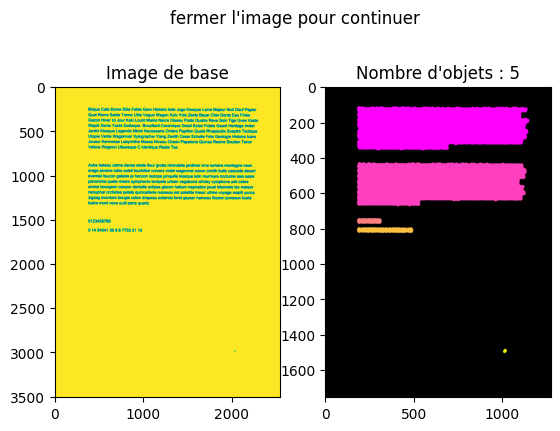

input_image_path : test_cas_simple.bmp
chemin_region :  TEST/caracteres\region1.bmp
chemin_region :  TEST/caracteres\region2.bmp
chemin_region :  TEST/caracteres\region3.bmp
chemin_region :  TEST/caracteres\region4.bmp
chemin_region :  TEST/caracteres\region5.bmp
['Alphabet_arial_chiffres', 'Alphabet_arial_majuscule', 'Alphabet_arial_minuscule']
Génération images dégradées pour le sous-alphabet :  Alphabet_arial_chiffres
Génération images dégradées pour le sous-alphabet :  Alphabet_arial_majuscule
Génération images dégradées pour le sous-alphabet :  Alphabet_arial_minuscule

-------------------------------------------------------------
Région 1:

  Ligne 1:
BriquevCakJDomeLEIiteyFabIeyGareLHistoireLIodeYJugeYKiosquefLaineYMHeurYNuitY0eufPapier
  Ligne 2:
QuaiJRameLSabIeLTonneLUtiIeYVdgueLWagonzxyIoYoIeLzesteLBazarCiterDentsEEauLFines
  Ligne 3:
GazonHHiverYIciYJourYKakiTLourdYMainsENacreLOiseaUTPoidsIQuatreIReveLSoinYTigeLUveeVaste
  Ligne 4:
WapitiYxenieLYachtzodiaqueLBrcuiIIadTCerami

KeyboardInterrupt: 

In [4]:
################################ 1 - Prétraitement ################################

output_image_path = 'TEST/image_pretraitement.jpg'
process_and_straighten_image(input_image_path, output_image_path)

################################ 2 - Segmentation zones ################################

segmentation_region(output_image_path)

################################ 3 - Segmentaiton caractères  ################################

print('input_image_path :', input_image_path)
segmentation_caractere_image(input_image_path)

###################### Entraîner le PCA avec un jeu de données #############################

# parcours des alphabets du dossier 'LETTRES/'
print(os.listdir('LETTRES/ARIAL')[0:-1])
for sous_alphabet in os.listdir('LETTRES/ARIAL')[0:-1] : 
    
    print('Génération images dégradées pour le sous-alphabet : ', sous_alphabet)

    genere_image_degradees(f'LETTRES/ARIAL/{sous_alphabet}', sous_alphabet)


################################ Reconnaissance caractères #############################

c = Classifieur(50)

for sous_alphabet in os.listdir('LETTRES/ARIAL')[0:-1] :
    c.load_data_degraded(f"TEST/Degrade/{sous_alphabet}")

c.train()
c.generate_center_dict()
reconnaissance_text_image(c)

################################ Conversion Braille #############################

if demander_oui_ou_non('Création des images Braille ? '):
    for region in texte:
        for ligne in region:
            for texte_ligne in ligne:
                draw_braille_image(texte, "Test_folder/braille_image.jpg") # changer en .png si erreur 

